<a href="https://colab.research.google.com/github/antonisapostoloudis/5th-Assignment/blob/main/5th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 5. Feature Importance, Dimensionality Reduction, KNN

## 1. Φόρτωμα δεδομένων

In [35]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## 2. Εμφάνιση καθενός ψηφίου σε plot

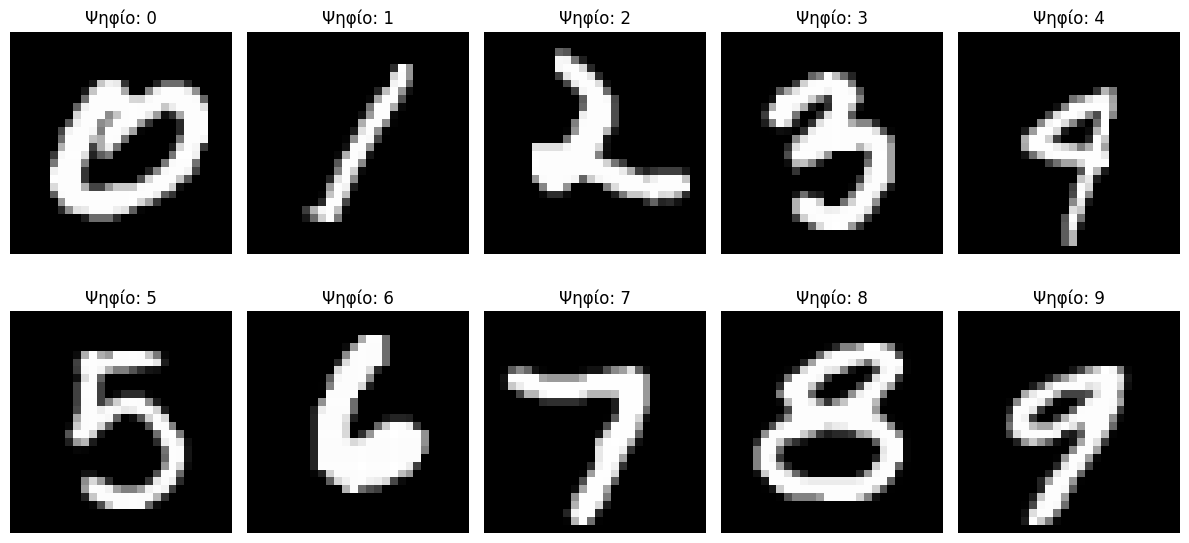

In [36]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(42)

# Επιλογή ενός τυχαίου δείγματος για κάθε ψηφίο
samples = []
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    idx = rng.choice(indices)
    samples.append(x_train[idx])

# Εμφάνιση σε 2x5 grid
plt.figure(figsize=(12, 6))

for i, img in enumerate(samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Ψηφίο: {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Μέγεθος εικόνας

In [37]:
x_train.shape
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Παραπάνω βλέπουμε πως το μέγεθος κάθες εικόνας είναι 28 x 28 pixels. Πρόκειται για ασπρόμαυρες εικόνες(greyscale) οπότε και για αυτό κάθε κελί στο 28x28 πίνακα παρουσιάζει 1 μόνο τιμή που αποτελεί και την φωτεινότητα(0 έως 255)

Στις εικόνες του MNIST, παρότι κάθε ψηφίο αποτελείται από 28 x 28 pixels, δεν έχουν όλα τα pixels την ίδια σημασία. Τα περισσότερα περιφερειακά pixels είναι σχεδόν μαύρα και δεν περιέχουν πληροφορία, καθώς λειτουργούν απλώς ως φόντο. Η ουσιαστική πληροφορία βρίσκεται στα pixels που σχηματίζουν τις γραμμές και τις καμπύλες του ψηφίου, δηλαδή τα strokes που καθορίζουν το σχήμα του αριθμού. Αυτά τα pixels είναι κρίσιμα για τη διάκριση μεταξύ ψηφίων, ενώ τα υπόλοιπα έχουν ελάχιστη συμβολή. Έτσι, η αναγνώριση του ψηφίου βασίζεται κυρίως στη δομή και στο μοτίβο των ενεργών pixels, και όχι στο σύνολο της εικόνας.

## 4. Μετατροπή εικόνων σε διανύσματα

In [38]:
x_train_flat = np.array([img.flatten() for img in x_train])
x_test_flat  = np.array([img.flatten() for img in x_test])


## 5. Εκπαίδευση ταξινομητών και υπολογισμός ακρίβειας

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Δημιουργία πίνακα με τις διαφορετικές τιμές του k
k_values=[5,15,51,int(np.sqrt(x_train_flat.shape[0]))]


# Εκπαίδευση ταξινομητών ΚΝΝ και υπολογισμός ακρίβειας για κάθε k
train_accuracies=[]
test_accuracies=[]

for k in k_values:
    print(f"Training model with k={k}")
    knn= KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(x_train_flat,y_train)

    y_train_pred=knn.predict(x_train_flat)
    y_test_pred=knn.predict(x_test_flat)

    train_accuracy=accuracy_score(y_train,y_train_pred)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Train accuracy for k={k}: {train_accuracy}")
    print(f"Test accuracy for k={k}: {test_accuracy}")



Training model with k=5
Train accuracy for k=5: 0.9819166666666667
Test accuracy for k=5: 0.9688
Training model with k=15
Train accuracy for k=15: 0.971
Test accuracy for k=15: 0.9633
Training model with k=51
Train accuracy for k=51: 0.9532333333333334
Test accuracy for k=51: 0.9533
Training model with k=244
Train accuracy for k=244: 0.9210666666666667
Test accuracy for k=244: 0.9241


### Δημιουργία line plot με τις ακρίβειες για κάθε k

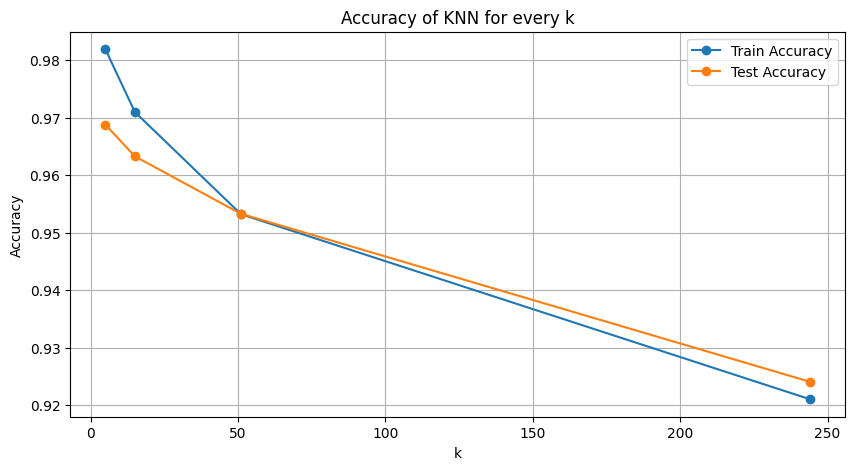

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.title("Accuracy of KNN for every k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## 6. Διαίρεση των x_train,x_test με 255 και επανάληψη του ερωτήματος 5

In [42]:
# Κανονικοποίηση των δεδομένων
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

train_accuracies_norm=[]
test_accuracies_norm=[]

for k in k_values:
    print(f"Training model with k={k}")
    knn= KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(x_train_norm,y_train)

    y_train_pred=knn.predict(x_train_norm)
    y_test_pred=knn.predict(x_test_norm)

    train_accuracy=accuracy_score(y_train,y_train_pred)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    train_accuracies_norm.append(train_accuracy)
    test_accuracies_norm.append(test_accuracy)

    print(f"Train accuracy for k={k}: {train_accuracy}")
    print(f"Test accuracy for k={k}: {test_accuracy}")


Training model with k=5
Train accuracy for k=5: 0.9819166666666667
Test accuracy for k=5: 0.9688
Training model with k=15
Train accuracy for k=15: 0.971
Test accuracy for k=15: 0.9633
Training model with k=51
Train accuracy for k=51: 0.9532333333333334
Test accuracy for k=51: 0.9533
Training model with k=244
Train accuracy for k=244: 0.9210666666666667
Test accuracy for k=244: 0.9241


### Αποτελέσματα μετά την κανονικοποίηση

Η κανονικοποίηση των δεδομένων με διαίρεση των pixel τιμών διά 255 δεν επηρέασε την ακρίβεια του ταξινομητή KNN, επειδή όλες οι τιμές κλιμακώθηκαν με τον ίδιο ακριβώς παράγοντα. Η Ευκλείδεια απόσταση, την οποία χρησιμοποιεί ο KNN, μεταβάλλεται μεν σε απόλυτη τιμή, όμως οι σχετικές αποστάσεις μεταξύ των δειγμάτων παραμένουν αμετάβλητες. Αυτό σημαίνει ότι οι κοντινότεροι γείτονες που επιλέγει ο ταξινομητής είναι ακριβώς οι ίδιοι τόσο πριν όσο και μετά την κανονικοποίηση, με αποτέλεσμα η διαδικασία ταξινόμησης να οδηγεί στις ίδιες αποφάσεις. Συνεπώς, η ακρίβεια στα train και test sets παραμένει πρακτικά ίδια, γεγονός που δείχνει ότι η ομοιόμορφη κλιμάκωση όλων των χαρακτηριστικών δεν επηρεάζει την απόδοση του KNN όταν χρησιμοποιείται η Ευκλείδεια απόσταση.

## 7.Έλεγχος με εισαγώμενο ψηφίο

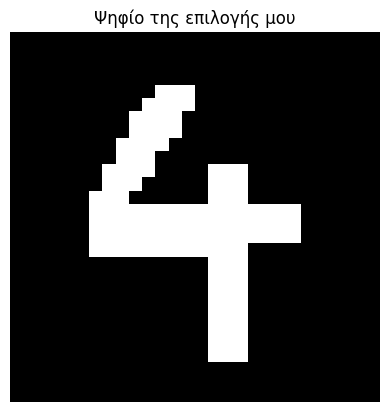

Το μοντέλο προβλέπει ότι το ψηφίο είναι: 4


In [41]:
from PIL import Image

img=Image.open("digit.png").convert('L')
img = img.resize((28, 28))

plt.imshow(img, cmap="gray")
plt.title("Ψηφίο της επιλογής μου")
plt.axis('off')
plt.show()

img_arr = np.array(img).astype("float32")

img_flat = img_arr.reshape(1, -1)


#Εκπαίδευση μοντέλου με το καλύτερο κ
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_train_flat, y_train)

prediction = knn.predict(img_flat)
print("Το μοντέλο προβλέπει ότι το ψηφίο είναι:", prediction[0])